# Visualising taxa abundance

In [1]:
setwd("/mnt/c/Users/Cedric/Desktop/git_repos/blood_microbiome")
require(tidyverse)
require(ggplot2)
require(data.table)
require(foreach)
require(ggpubr)
require(scales)
require(ggsci)
require(ggforce)
require(ggpubr)


Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required packag

### Load non-contaminant list

In [2]:
# After thresholding
prev_df <- fread("results/decontamination/prevalence_RA0.005_read10.csv")
original_list <- colnames(prev_df)
original_list <- original_list[original_list != "npm_research_id"]
length(original_list)

# Differential prevalence
diff_prev_nc <- read.csv("results/decontamination/diff_prev_V3/noncontaminants.RA0.005.read_threshold10.max_prev0.25.fold_diff2.txt")$taxa
diff_prev_c <- read.csv("results/decontamination/diff_prev_V3/contaminants.RA0.005.read_threshold10.max_prev0.25.fold_diff2.txt")$taxa
length(diff_prev_nc)
length(diff_prev_c)

# Correlation filter
corr_nc <- read.csv("results/decontamination/correlation_decontamination/nc.diff_prev_V3.RA0.005.read_threshold10.max_prev0.25.fold_diff2.corr_t0.7.S.n9999.txt")$non_contaminant_taxon
corr_c <- read.csv("results/decontamination/correlation_decontamination/contam.diff_prev_V3.RA0.005.read_threshold10.max_prev0.25.fold_diff2.corr_t0.7.S.n9999.txt")$contaminant

length(corr_nc)
length(corr_c)

# Simple batch filter
batch_nc <- read.csv("results/decontamination/simple_batch_decontam/nc.corr_t0.7.txt")$taxa
length(batch_nc)

# After max count filter
species_read_zeroed <- fread("results/decontamination/read_matrix_n157.global_decontaminated.zeroed.csv")
final_list <- colnames(species_read_zeroed)
final_list <- final_list[final_list != "npm_research_id"]
length(final_list)

[1] 870

[1] 710

[1] 160

[1] 645

[1] 65

[1] 238

[1] 157

## Compare to host range list (Shaw et al., 2020)

Original paper: https://onlinelibrary.wiley.com/doi/full/10.1111/mec.15463

Data: https://figshare.com/articles/dataset/The_phylogenetic_range_of_bacterial_and_viral_pathogens_of_vertebrates_dataset_and_supplementary_material/8262779

### Get human infection list

In [3]:
host_df <- read.csv("data/PathogenVsHostDB-2019-05-30.csv", row.names = 1)
human_df <- host_df %>% 
    select(Species, Human) %>%
    distinct()

before_df <- tibble(Species = original_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df)

fwrite(before_df, "results/decontamination/comparison/shaw_human_list_raw.csv")

Warning message:
“Expected 3 pieces. Additional pieces discarded in 66 rows [5, 65, 66, 67, 71, 72, 73, 74, 75, 79, 186, 223, 226, 261, 276, 300, 302, 336, 354, 392, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 584 rows [10, 11, 12, 13, 14, 15, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 52, 53, 54, ...].”
Joining, by = "Species"


### After manual literature review

In [4]:
human_df_parsed <- fread("results/decontamination/comparison/shaw_human_list_parsed.csv") %>%
    select(-Genus)

before_df_parsed <- tibble(Species = original_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df_parsed)

after_df <- tibble(Species = final_list) %>%
    separate(Species, into = c("Genus", NA, NA), sep = " ", remove = F) %>%
    mutate(Genus = ifelse(grepl("virus", Species, ignore.case = T), NA, Genus)) %>%
    left_join(human_df_parsed)

Warning message:
“Expected 3 pieces. Additional pieces discarded in 66 rows [5, 65, 66, 67, 71, 72, 73, 74, 75, 79, 186, 223, 226, 261, 276, 300, 302, 336, 354, 392, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 584 rows [10, 11, 12, 13, 14, 15, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 52, 53, 54, ...].”
Joining, by = "Species"
Warning message:
“Expected 3 pieces. Additional pieces discarded in 8 rows [37, 75, 116, 133, 136, 137, 146, 151].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 127 rows [1, 3, 4, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, ...].”
Joining, by = "Species"


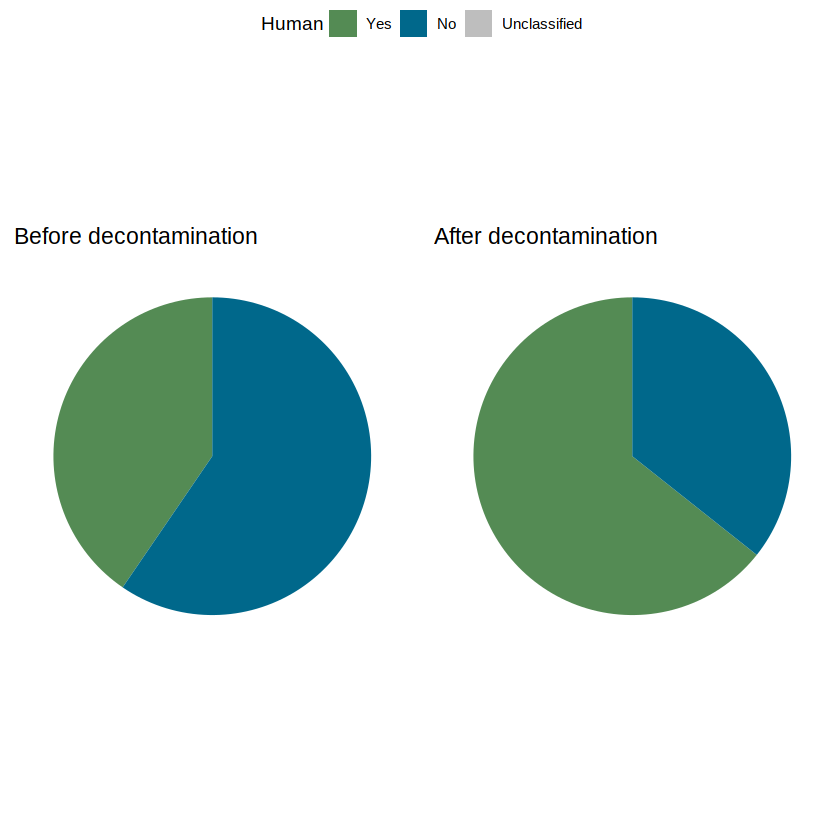

In [5]:
get_shaw_circle <- function(df, title) {
    df %>% 
        mutate(Human = ifelse(is.na(Human), "Unclassified", Human)) %>%
        mutate(Human = factor(Human, levels = c("Yes", "No", "Unclassified"))) %>%
        ggplot(aes(x = 1, fill = Human)) +
            geom_bar(aes(y = ..count..)) +
            coord_polar("y") +
            theme_minimal() +
            labs(title = title) +
            theme(axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  panel.border = element_blank(),
                  panel.grid = element_blank(),
                  axis.ticks = element_blank(),
                  axis.text = element_blank()) +
            scale_fill_manual(limits = c("Yes", "No", "Unclassified"),
                          values = c("palegreen4", "deepskyblue4", "grey"))
}

ggarrange(get_shaw_circle(before_df_parsed, "Before decontamination"), 
          get_shaw_circle(after_df, "After decontamination"), 
          common.legend = T)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



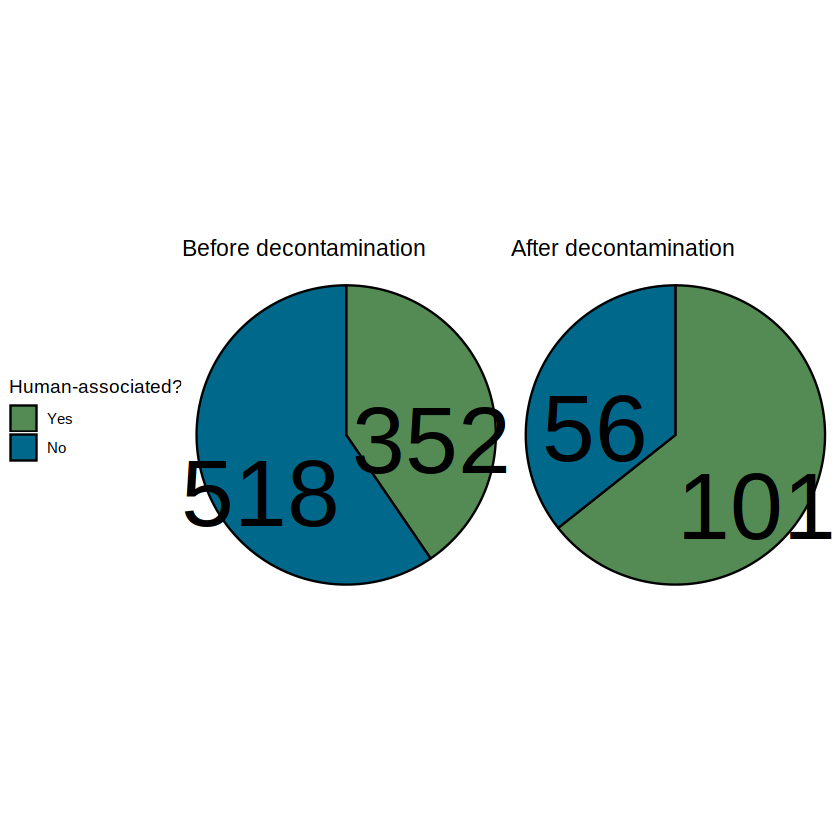

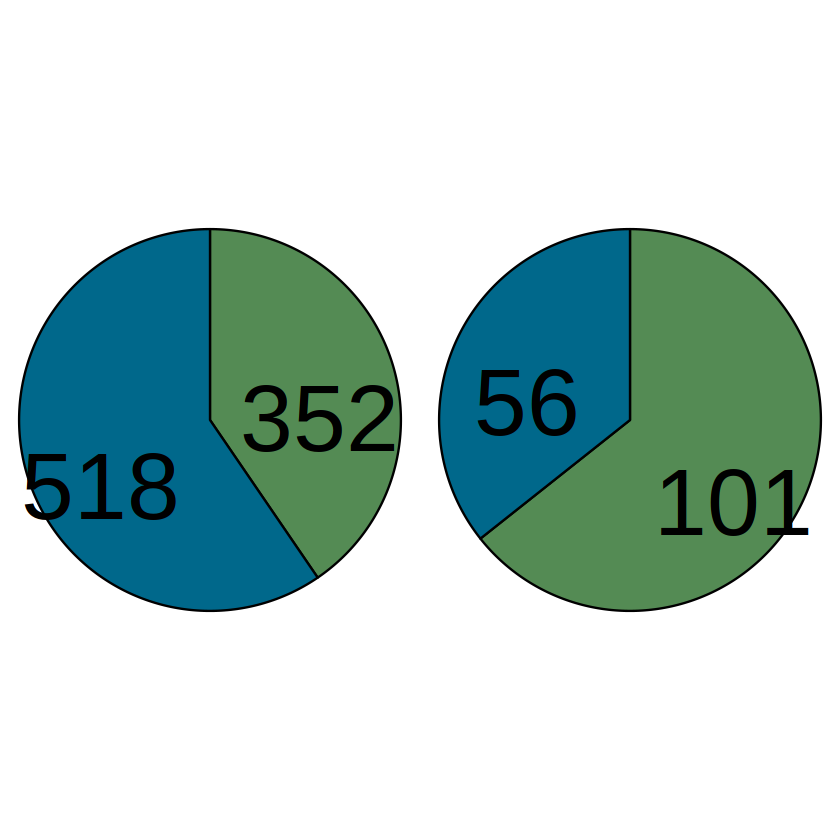

In [6]:
get_shaw_circle <- function(df, title) {
    rpie <- 1
    rlabel <-  0.6 * rpie
    df %>% 
        mutate(Human = factor(Human, levels = c("Yes", "No"))) %>%
        group_by(Human) %>%
        summarise(cnt = n(), total = nrow(df)) %>%
        mutate(end_angle = 2 * pi * cumsum(cnt) / total,      # ending angle for each pie slice
               start_angle = lag(end_angle, default = 0),   # starting angle for each pie slice
               mid_angle = 0.5 * (start_angle + end_angle)) %>%  # middle of each pie slice, for the text label
        ggplot() +
        geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = rpie,
                    start = start_angle, end = end_angle, fill = Human)) +
        geom_text(aes(x = rlabel * sin(mid_angle), y = rlabel * cos(mid_angle), label = cnt),
                    hjust = 0.5, vjust = 1, size = 20) +
        coord_fixed() +
        scale_x_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_y_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_fill_manual(limits = c("Yes", "No"),
                          values = c("palegreen4", "deepskyblue4")) +
        theme(panel.background = element_rect(fill = "white"),
              plot.margin=grid::unit(c(0,0,0,0),"cm"),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks=element_blank(),
              legend.position = "none",
              axis.ticks.length = unit(0, "pt")) +
        labs(x = NULL, y = NULL, fill = NULL) +
        labs(fill = "Human-associated?", title = title)

}

ggarrange(get_shaw_circle(before_df_parsed, "Before decontamination"), 
          get_shaw_circle(after_df, "After decontamination"), 
          common.legend = T, legend = "left")

ggsave("results/decontamination/comparison/shaw_comparison.png", dpi = 600)

# Get separate plots
before_shaw <- get_shaw_circle(before_df_parsed, NULL)
ggsave("results/decontamination/comparison/shaw_before_nolegend.png", plot = before_shaw, dpi = 600)

after_shaw <- get_shaw_circle(after_df, NULL)
ggsave("results/decontamination/comparison/shaw_after_nolegend.png", plot = after_shaw, dpi = 600)


ggarrange(get_shaw_circle(before_df_parsed, NULL), 
          get_shaw_circle(after_df, NULL), legend = "none")

## Compare to contaminant list (Poore et al., 2020)

Supplementary Table 7 from https://www.nature.com/articles/s41586-020-2095-1#MOESM2

In [7]:
poore_list <- fread("data/poore_et_al_contaminant_list.csv")
before_df2 <- before_df_parsed %>%
    left_join(poore_list)

after_df2 <- after_df %>%
    left_join(poore_list)

Joining, by = "Genus"
Joining, by = "Genus"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



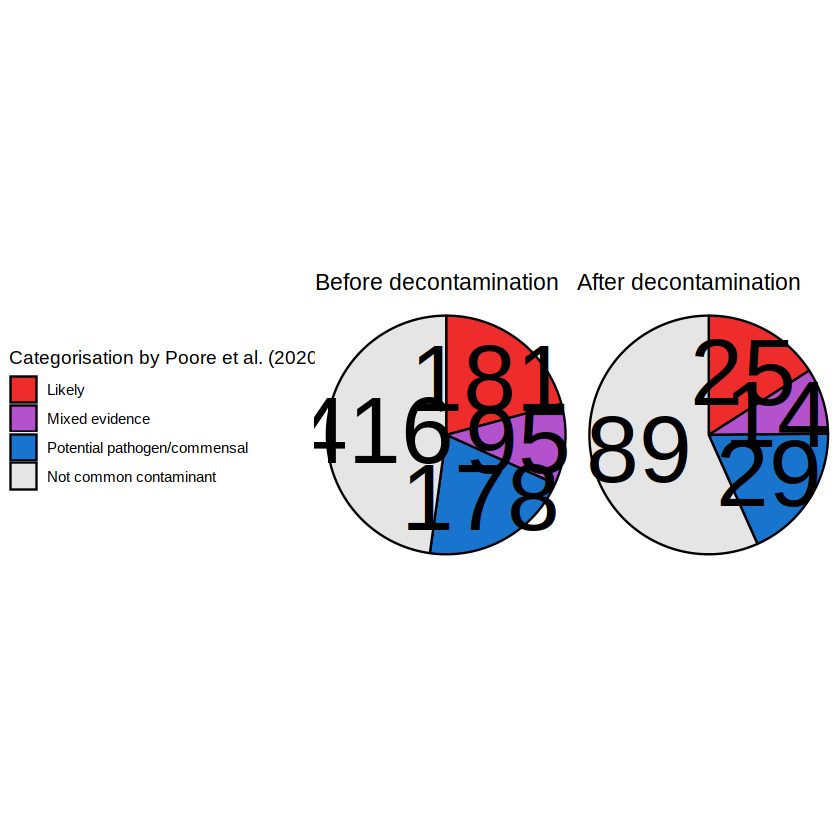

In [11]:
get_poore_circle <- function(df, title) {
    rpie <- 1
    rlabel <-  0.6 * rpie
    
    df %>% 
        mutate(category = case_when(is.na(category) ~ "Not common contaminant",
                                    category == "LIKELY CONTAMINANT" ~ "Likely",
                                    category == "POTENTIALLY PATHOGENIC OR COMMENSAL" ~ "Potential pathogen/commensal",
                                    category == "MIXED EVIDENCE" ~ "Mixed evidence")) %>%
        mutate(category = factor(category, c("Likely", 
                                             "Mixed evidence",
                                             "Potential pathogen/commensal",
                                             "Not common contaminant"))) %>%
        group_by(category) %>%
        summarise(cnt = n(), total = nrow(df)) %>%
        mutate(end_angle = 2 * pi * cumsum(cnt)/ total,      # ending angle for each pie slice
               start_angle = lag(end_angle, default = 0),   # starting angle for each pie slice
               mid_angle = 0.5 * (start_angle + end_angle)) %>%  # middle of each pie slice, for the text label
        ggplot() +
        geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = rpie,
                    start = start_angle, end = end_angle, fill = category)) +
        geom_text(aes(x = rlabel * sin(mid_angle), y = rlabel * cos(mid_angle), label = cnt),
                    hjust = 0.5, vjust = 0.5, size = 20) +
        coord_fixed() +
        scale_x_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_y_continuous(limits = c(-1, 1), name = "", breaks = NULL, labels = NULL) +
        scale_fill_manual(values = c("firebrick2", "mediumorchid3", "dodgerblue3", "grey90")) +
        theme(panel.background = element_rect(fill = "white"),
              plot.margin=grid::unit(c(0,0,0,0),"cm"),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks=element_blank(),
              legend.position = "none",
              axis.ticks.length = unit(0, "pt")) +
        labs(x = NULL, y = NULL, fill = NULL) +
        labs(fill = "Categorisation by Poore et al. (2020)", title = title)
}

ggarrange(get_poore_circle(before_df2, "Before decontamination"), 
          get_poore_circle(after_df2, "After decontamination"), 
          common.legend = T, legend = "left")

ggsave("results/decontamination/comparison/poore_comparison.png", dpi = 600)

# Get separate plots
before_poore <- get_poore_circle(before_df2, NULL)
ggsave("results/decontamination/comparison/poore_before_nolegend.png", plot = before_poore, dpi = 600)

after_poore <- get_poore_circle(after_df2, NULL)
ggsave("results/decontamination/comparison/poore_after_nolegend.png", plot = after_poore, dpi = 600)